# **Problem Statement**


**Context or company background**

TechWorks Consulting is a consulting company that specializes in providing top-notch IT talent
to a variety of businesses. The company is known for its ability to quickly and efficiently find and
place highly skilled IT professionals in a variety of positions.
The company takes multiple factors into account
when determining an employee's salary,including the employee's experience, qualifications, and
performance.

**Data description**
the dataset conatin information about
1.College name: Colleges belong to three groups Tier1,Tier2 and Tier3 where
2.City:It has 2 types of cities: metro and non metro cities
3.Role: Manager and Executive
And other columns Like: Previous CTC,Previous Job Change,Graduation marks, Experience in
Months and CTC

**Regression task**
 the primary objective is to perform regression task which help us to predict salary of newly hired employees

**Statistics**

statistics will also  helps us to evaluate the
significance of the model's coefficients and to make sure that the our results are reliable and not just
by chance.

**Data preprocessing**
Data pre-processing involves cleaning and transforming the data to make it suitable for training
a machine learning model. This can include tasks such as:
Handling missing values,Handling outliers,Handling categorical variables,
normalization,Feature selection.

# *** # Creating a salary prediction  model : A systematic approach ***

Data Understanding
 begining by thoroughly understanding the dataset,including its structure,columns and meaning of each variable
  
**data processing**

  Data pre-processing involves cleaning and transforming the data to make it suitable for training
a machine learning model. This can include tasks such as:

● **Handling missing values**: Some data points may be missing, we can either use statitics or we can remove the varibale

● **Handling outliers: **outliers can greatly affect the model predictions and
 we can either remove them or transform them in a way that they would not
impact the model's performance.

● **Handling categorical variables:** Many machine learning algorithms can only work with numerical data, we  need to convert categorical  variables, such as education level, job titles, etc, into numerical values

● **Normalization:** Scaling the values of different features to the same range so that one feature does not dominate the others

● **Feature selection**: Choosing a subset of the most important features to use as inputs to the regression model

**performing exploratory data analysis (EDA)**
 1. **Model selection **
 Here we select the model we will use for regression like lasso, ridge, linearRegression to build and evalaute our model

 2.. ** model selection and training**
  * first we split the data into test and training set and assess the model to evaluate it
  * Use appropritate evaluation metrics like MSE(mean squared error),r square,
  * Mean absolute eror to measure model accuracy
   experiment with dirffrent hyperparameter to get the model accuracy

 **model comaprison**

compare the diffrent model and get to know which model is performing the best

  **further improvement**

  consider additional teachniques for model improvement such as ensemble technique ,grid search etc
  




## **3.The available ML model option had to perform this task**



In order to  predict the salary of  employees salary we have to take into account a variety of factors, including the market rate, the
employee's experience and qualifications, and the employee's performance  
 to predict the salary we can use various method like

1. **LinearRegression=**  it is a statistical approach for modeling the relationship between a scalar dependent variable and one or more explanatory variables

2.  **.Ridge and lasso regression** = it is  a powerful technique for regularizing linear regression models and preventing overfitting. They both add a penalty term to the cost function but a slightly diffrence

3    **Decision tree** = it is a is a flowchart-like structure used to make decisions or predictions. It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions.

4  **.k-nearest neighbors (KNN)**- it is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.



#downloading the library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# case study csv
df=pd.read_csv("/content/drive/MyDrive/ML case Study.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [ ]:
# to get the city data
city =pd.read_csv("/content/drive/MyDrive/cities.csv")
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [ ]:
# to convert the city to list
metro_city = city["Metrio City"].tolist()
non_metro = city["non-metro cities"].tolist()

In [ ]:
# to change the metro city to 1 and non metro city to 0
for item in df.City:
  if item in metro_city:
    df["City"].replace(item,1,inplace=True)
  elif item in non_metro:
    df["City"].replace(item,2,inplace=True)

In [ ]:
college =pd.read_csv("/content/drive/MyDrive/Colleges.csv")
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [ ]:
# to divide the colleges into tier
tier1=college["Tier 1"].tolist()
tier2=college["Tier 2"].tolist()
tier3=college["Tier 3"].tolist()

In [ ]:
# to change the tier1 to 1 , tier2=2 ,tier3=3
for item in df.College:
  if item in tier1:
    df["College"].replace(item,1,inplace=True)
  elif item in tier2:
    df["College"].replace(item,2,inplace=True)
  elif item in tier3:
    df["College"].replace(item,3,inplace=True)

In [ ]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,2,Manager,55523.0,3,66,19,71406.58
1,2,2,Executive,57081.0,1,84,18,68005.87
2,3,2,Executive,60347.0,2,52,28,76764.02
3,3,2,Executive,49010.0,2,81,33,82092.39
4,1,2,Executive,57879.0,4,74,32,73878.10


**Data preprocessing **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


In [ ]:
# changing the type of vairable
df["Previous CTC"]=df["Previous CTC"].astype(int)
df["CTC"]=df["CTC"].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   College              1589 non-null   int64 
 1   City                 1589 non-null   int64 
 2   Role                 1589 non-null   object
 3   Previous CTC         1589 non-null   int64 
 4   Previous job change  1589 non-null   int64 
 5   Graduation Marks     1589 non-null   int64 
 6   EXP (Month)          1589 non-null   int64 
 7   CTC                  1589 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 99.4+ KB


In [ ]:
#  creating the dummy variable
df=pd.get_dummies(df,columns=["Role"],drop_first=True, dtype=int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   College              1589 non-null   int64
 1   City                 1589 non-null   int64
 2   Previous CTC         1589 non-null   int64
 3   Previous job change  1589 non-null   int64
 4   Graduation Marks     1589 non-null   int64
 5   EXP (Month)          1589 non-null   int64
 6   CTC                  1589 non-null   int64
 7   Role_Manager         1589 non-null   int64
dtypes: int64(8)
memory usage: 99.4 KB


In [ ]:
df.head()


,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,2,55523,3,66,19,71406,1
1,2,2,57081,1,84,18,68005,0
2,3,2,60347,2,52,28,76764,0
3,3,2,49010,2,81,33,82092,0
4,1,2,57879,4,74,32,73878,0


**outliers**

In [ ]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,1.485840,55518.453744,2.528634,59.855255,39.044682,75352.790434,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.293679,0.404862
min,1.000000,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.000000,0.000000
25%,1.000000,1.000000,50518.000000,2.000000,46.000000,26.000000,66902.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.000000,0.000000
75%,3.000000,2.000000,60109.000000,4.000000,73.000000,51.000000,80588.000000,0.000000
max,3.000000,2.000000,77911.000000,4.000000,85.000000,64.000000,123416.000000,1.000000


# creating the chart

<Axes: xlabel='College', ylabel='count'>

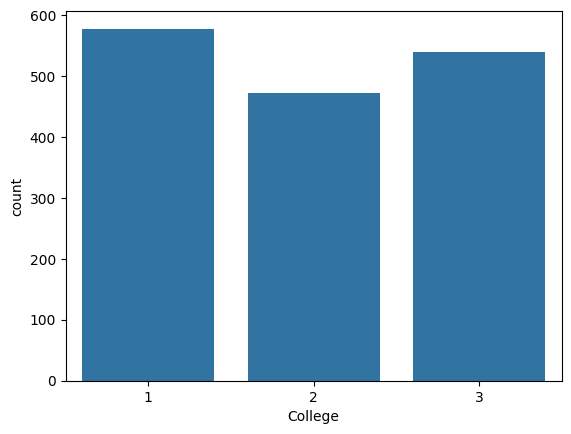

In [ ]:
sns.countplot(x="College", data =df)

<Axes: xlabel='City', ylabel='count'>

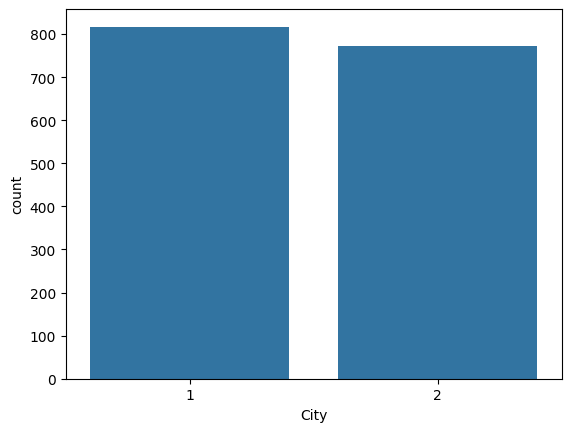

In [ ]:
#here 1 refer to metro city and 2 refer to non metro city
sns.countplot(x="City", data =df)

<Axes: ylabel='Previous job change'>

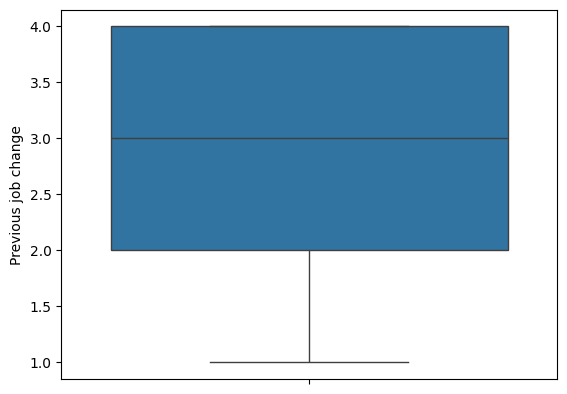

In [ ]:
sns.boxplot(df["Previous job change"])

# checking for outlier for previous ctc








<Axes: xlabel='Previous CTC'>

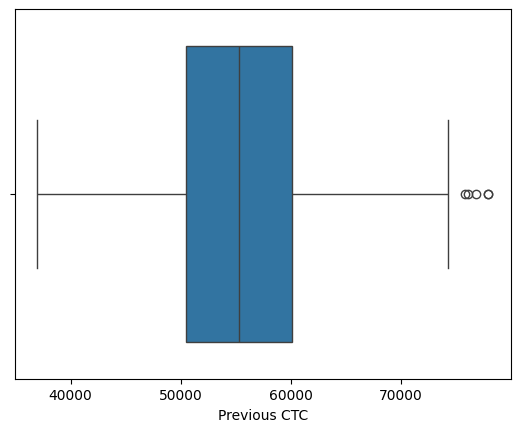

In [ ]:
sns.boxplot(x="Previous CTC", data=df)

In [ ]:
np.percentile(df["Previous CTC"],[99])

array([71506.92])

In [ ]:
uv = np.percentile(df["Previous CTC"],[99])[0]

In [ ]:
df[(df["Previous CTC"]>uv)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
116,3,1,77911,1,50,58,87831,0
292,3,2,74198,1,57,25,99644,1
543,1,1,73856,1,75,54,121362,1
572,1,1,71543,4,82,30,61366,0
701,2,2,71549,4,47,50,83116,0
847,1,1,71756,4,67,23,72141,0
860,1,1,75785,4,63,37,110338,1
941,3,1,72319,1,51,50,63538,0
1024,1,1,72661,3,74,47,70238,0
1047,1,2,73214,4,57,22,100119,1


In [ ]:
df.loc[(df["Previous CTC"] > 3*uv)] = 3*uv

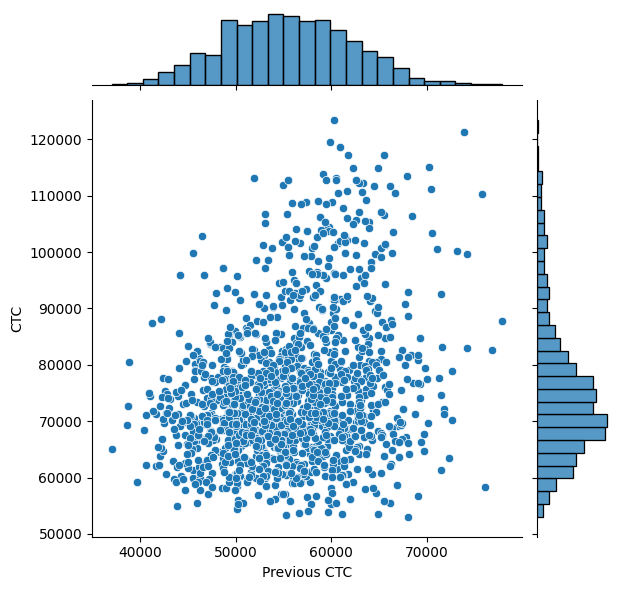

In [ ]:
#other method
sns.jointplot(x='Previous CTC',y='CTC', data =df)

In [ ]:
percent25 = df['Previous CTC'].quantile(0.25)
percent75 = df['Previous CTC'].quantile(0.75)

In [ ]:
iqr = percent75 - percent25
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

In [ ]:
df[(df['Previous CTC'] < lower_limit) | (df['Previous CTC'] > upper_limit)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
116,3,1,77911,1,50,58,87831,0
860,1,1,75785,4,63,37,110338,1
1088,3,1,76815,4,75,52,82684,0
1317,1,2,76070,2,54,18,58309,0
1454,1,1,77911,1,50,58,87831,0


**here we can see that there are some outlier are present but they are not that extreme that make huge diffrence while making prediction so i my view point this keeping this outlier will be more useful than removing**

# checking outlier for CTC

<Axes: ylabel='CTC'>

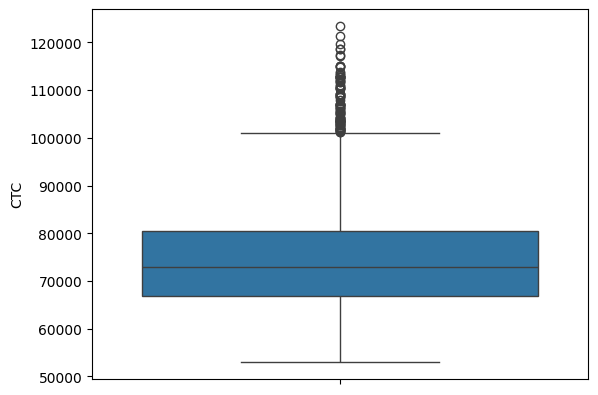

In [ ]:
sns.boxplot(df["CTC"])

In [ ]:
np.percentile(df.CTC,[99])

array([112826.])

In [ ]:
uv = np.percentile(df.CTC,[99])[0]

In [ ]:
df[(df.CTC>uv)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
34,1,2,60894,4,80,28,118651,1
185,2,2,70258,4,38,36,115126,1
254,2,1,51912,2,66,50,113141,1
328,3,2,62264,2,52,64,114996,1
543,1,1,73856,1,75,54,121362,1
577,3,1,59101,3,56,31,113843,1
668,1,1,60476,1,85,62,113212,1
883,3,1,64930,1,66,51,114939,1
1146,1,1,61709,4,39,60,117207,1
1230,2,2,60298,1,47,52,123416,1


In [ ]:
df.CTC[(df.CTC>3*uv)]= 3*uv


In [ ]:
percent25 = df['Previous CTC'].quantile(0.25)
percent75 = df['Previous CTC'].quantile(0.75)

In [ ]:
iqr = percent75 - percent25
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

In [ ]:
df[(df['CTC'] < lower_limit) | (df['CTC'] > upper_limit)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
2,3,2,60347,2,52,28,76764,0
3,3,2,49010,2,81,33,82092,0
9,1,2,51141,1,47,60,85648,0
10,1,1,49497,1,50,25,74914,0
11,2,1,50197,2,66,62,85219,1
...,...,...,...,...,...,...,...,...
1580,1,1,53027,4,69,55,106846,0
1581,3,2,55858,4,47,40,77673,0
1582,1,2,49074,3,58,63,84287,1
1583,3,2,54121,3,51,54,84320,0


**here we can see that there are some outlier are present in CTC but they are not that extreme that make huge diffrence while making prediction so i my view point this keeping this outlier will be more useful than removing**

In [ ]:
# creating of corrrelation matrix
corr_matrix = df.corr()

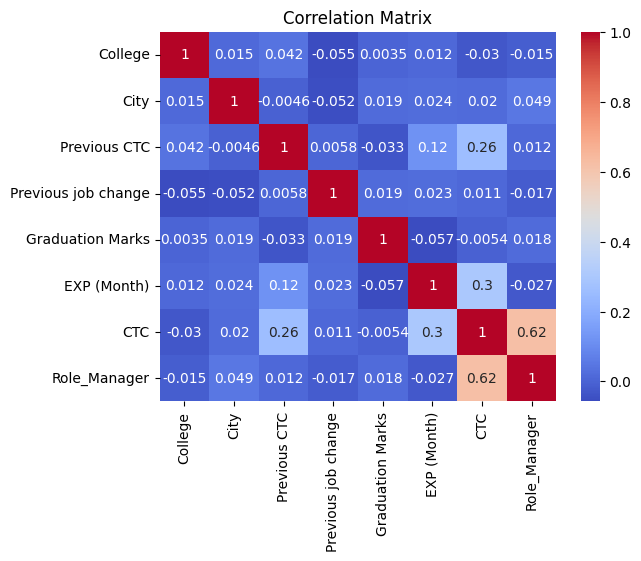

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**here we can see from correlation matrix that previous ctc will be directly impact on the our dependent variable"ctc"**

#Applying all model without any feature

#importing  necessary library

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


#**`Linear Regression`**

In [ ]:
import statsmodels.api as sm

# Define the target variable (y) and features (X)
X = df.drop('CTC', axis=1)  # Features
y = df['CTC']  # Target variable

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_const).fit()

# Display the summary of the model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 27 Sep 2024   Prob (F-statistic):          4.71e-257
Time:                        04:53:31   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.918e+04   2271.954     17.246      0.000    3.47e+04    4.36e+04
College              -481.5171    258.382     -1.864      0.063    -988.324      25.290
City                 -380.8471    433.456     -0.879      0.380   -1231.056     469.362
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5629    192.887      0.656      0.512    -251.779     504.905
Graduation Marks        6.2366     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3459     15.460     16.904      0.000     231.021     291.671
Role_Manager         1.949e+04    534.695     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.727   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.300
Skew:                           0.408   Prob(JB):                     9.81e-13
Kurtosis:                       3.411   Cond. No.                     5.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
 from sklearn.linear_model import LinearRegression
 X = df.drop('CTC', axis=1)  # Features
y = df['CTC']  # Target variable
 lr=LinearRegression()
 lr.fit(X,y)

LinearRegression()

In [ ]:
print(lr.intercept_)

39182.417438550765


In [ ]:
print(lr.coef_)

[-4.81517095e+02 -3.80847147e+02  4.10087094e-01  1.26562908e+02
  6.23658369e+00  2.61345898e+02  1.94874110e+04]




> Add blockquote

> Add blockquote




# **TEST AND TRAINING THE MODEL**
```



In [ ]:
# Defining the independent variable (X) and dependent variable (y)
X = df.drop('CTC', axis=1)  # Features
y = df['CTC']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a  linear regression model
lr= LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict the 'quality' on the test set
y_pred = lr.predict(X_test)

y_pred_train = lr.predict(X_train)

# Calculate R-squared and Mean Squared Error (MSE) for the model
r_squared_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

r_squared_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)


In [ ]:

print(f"R-squared for training set: {r_squared_train}")
print(f"Mean Squared Error for training set: {mse_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")


R-squared for training set: 0.5137734046204612
Mean Squared Error for training set: 73096551.52229236
R-squared for test set: 0.5933515097281489
Mean Squared Error for test set: 77362921.92796248


#**ridge model without feature on test size 0.2**

In [ ]:


# Create a Ridge regression model
alpha = 0.5  # Regularization parameter (you can tune this)
model_ridge = Ridge(alpha=alpha)

# Train the model
model_ridge.fit(X_train, y_train)

# Predict the 'quality' on the training and test sets
y_pred_train = model_ridge.predict(X_train)
y_pred_test = model_ridge.predict(X_test)

# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train = mean_squared_error(y_train,y_pred_train)


In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.5137711867678653
R-squared for test set: 0.5930057182880144
Mean Squared Error for test set: 77428707.08843018
Mean Squared Error for training set: 73096884.94168589


# **lasso model without feature on test size 0.2**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Create a Lasso regression model
alpha = 0.5  # Regularization parameter (you can tune this)
model_lasso = Lasso(alpha=alpha)

# Train the model
model_lasso.fit(X_train, y_train)

# Predict the 'quality' on the training and test sets
y_pred_train = model_lasso.predict(X_train)
y_pred_test = model_lasso.predict(X_test)

# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train = mean_squared_error(y_train,y_pred_train)



In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.5137733832147668
R-squared for test set: 0.5933271765123391
Mean Squared Error for test set: 77367551.20538506
Mean Squared Error for training set: 73096554.74030316


 # **DECISION TREE without feature on test size 0.2**

In [ ]:
from sklearn.metrics import r2_score
from sklearn import tree
#create a decision tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
# fiiting the model
regtree.fit(X_train,y_train)
# Predict the 'quality' on the training and test sets
y_pred_train = regtree.predict(X_train)
y_pred_test = regtree.predict(X_test)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train = mean_squared_error(y_train,y_pred_train)



In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.6062943355764511
R-squared for test set: 0.5949134132218526
Mean Squared Error for test set: 77065777.29092808
Mean Squared Error for training set: 59187478.960689805


#**plotting the decision tree**





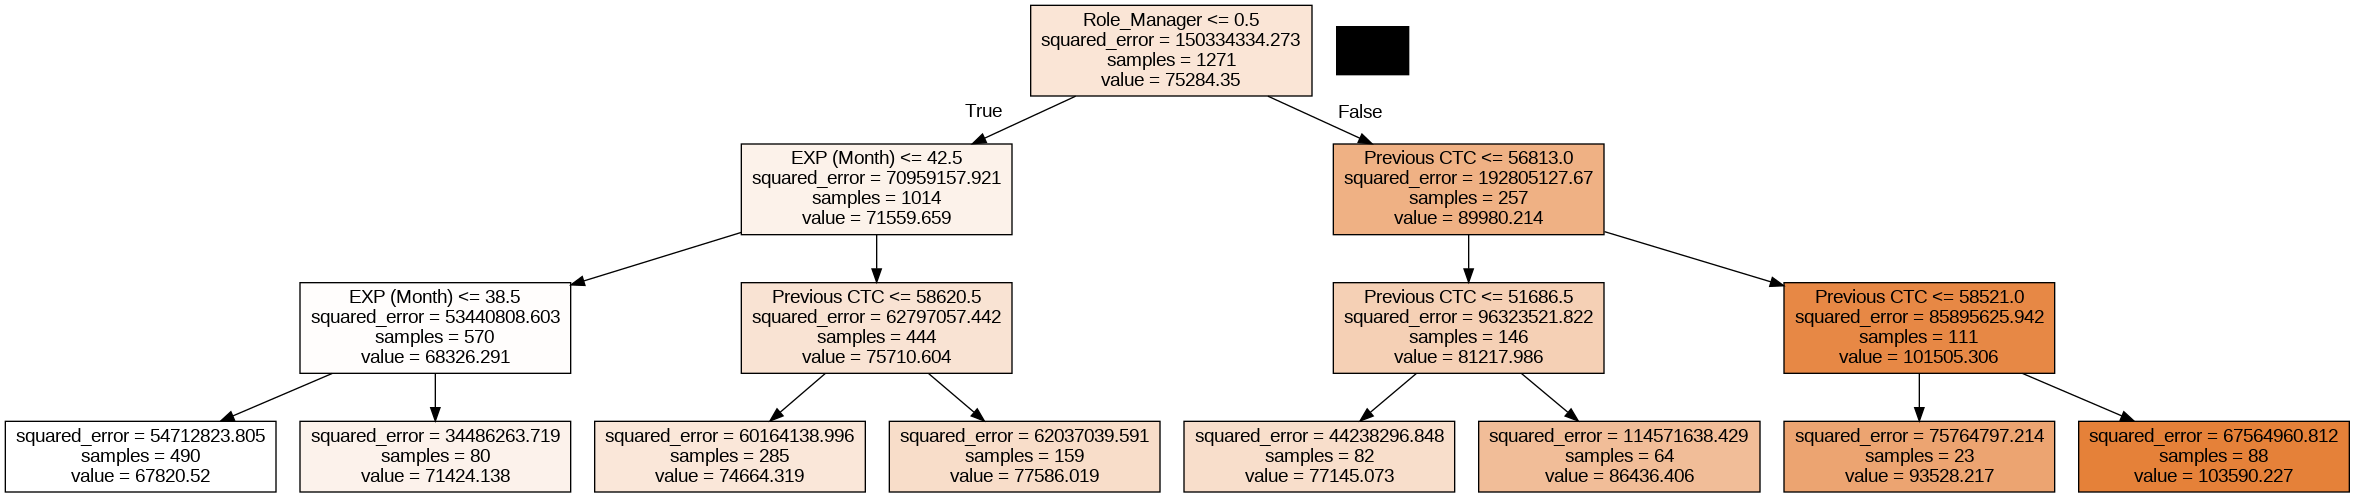

In [ ]:

#creating the decision tree
dot_data= tree.export_graphviz(regtree,out_file=None)
# importing the image
from IPython.display import Image
!pip install pydotplus
import pydotplus
#creating the tree
regtree1= tree.DecisionTreeRegressor(max_depth=3)
regtree1.fit(X_train,y_train)
dot_data= tree.export_graphviz(regtree1,out_file=None,feature_names=X_train.columns,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#**random forest without feature on test size 0.2**

In [ ]:
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#create a random forest regressor
rf_reg=RandomForestRegressor(n_estimators=1000,n_jobs=-1)
rf_reg.fit(X_train,y_train)
# Predict the 'quality' on the training and test sets
y_pred_train = rf_reg.predict(X_train)
y_pred_test = rf_reg.predict(X_test)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train = mean_squared_error(y_train,y_pred_train)


In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.9505837693008156
R-squared for test set: 0.6359059818378513
Mean Squared Error for test set: 69267138.02056935
Mean Squared Error for training set: 7428956.144451218


**here the diffrence between r squared value of test and trainning part is large so  i have changed the parameter**

In [ ]:
#with diffrent parameter
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

rf_reg=RandomForestRegressor(n_jobs=-1)
param_grid={"max_features": [4,5,6,7,8,9,10],
            "min_samples_split":[2,3,10],
            "n_estimators":[100,150,250],
            "max_depth":[2,3,4] }
gd_sr=GridSearchCV(estimator=rf_reg,param_grid=param_grid,scoring="accuracy",cv=5,n_jobs=-1)
gd_sr.fit(X_train,y_train)
gd_sr.best_params_


{'max_depth': 2,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#create a random forest regressor
rf_reg=RandomForestRegressor(n_jobs=-1,max_features=4, min_samples_split=2,n_estimators=100,max_depth=3)
rf_reg.fit(X_train,y_train)
# Predict the 'quality' on the training and test sets
y_pred_train = rf_reg.predict(X_train)
y_pred_test = rf_reg.predict(X_test)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_train = mean_squared_error(y_train,y_pred_train)

In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.6001784555148607
R-squared for test set: 0.5872418008688748
Mean Squared Error for test set: 78525264.69029911
Mean Squared Error for training set: 60106905.71824354


#**gradient boosting without feature on test size 0.2**





In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbc_reg2=GradientBoostingRegressor()
gbc_reg2.fit(X_train,y_train)
gbc_reg2=GradientBoostingRegressor( learning_rate=0.01,n_estimators=500,max_depth=1)
gbc_reg2.fit(X_train,y_train)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.6001784555148607
R-squared for test set: 0.5872418008688748


#**checking model size with test size 0.1**

In [ ]:
# Defining the independent variable (X) and dependent variable (y)
X = df.drop('CTC', axis=1)  # Features
y = df['CTC']  # Target variable

# Splitting the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a  linear regression model
lr= LinearRegression()

# Train the model
lr.fit(X_train2, y_train2)

# Predict the 'quality' on the test set
y_pred_test2= lr.predict(X_test2)

y_pred_train2 = lr.predict(X_train2)

# Calculate R-squared and Mean Squared Error (MSE) for the model
r_squared_test = r2_score(y_test2, y_pred_test2)
mse_test = mean_squared_error(y_test2, y_pred_test2)

r_squared_train = r2_score(y_train2, y_pred_train2)
mse_train = mean_squared_error(y_train2, y_pred_train2)


In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"Mean Squared Error for training set: {mse_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")


R-squared for training set: 0.5180163911817306
Mean Squared Error for training set: 73576267.4100835
R-squared for test set: 0.6363230307340053
Mean Squared Error for test set: 75992462.43827608





 # **Ridge regression without feature on test size 0.1**









In [ ]:

# Create a Ridge regression model
alpha = 0.5  # Regularization parameter (you can tune this)
model_ridge = Ridge(alpha=alpha)

# Train the model
model_ridge.fit(X_train2, y_train2)

# Predict the 'quality' on the training and test sets
y_pred_train2 = model_ridge.predict(X_train2)
y_pred_test2 = model_ridge.predict(X_test2)

# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train2, y_pred_train2)
r_squared_test = r2_score(y_test2, y_pred_test2)
mse_test=mean_squared_error(y_test2,y_pred_test2)
mse_train = mean_squared_error(y_train2,y_pred_train2)


In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.5180146063397157
R-squared for test set: 0.6359668884558285
Mean Squared Error for test set: 76066880.48226622
Mean Squared Error for training set: 73576539.87165888


#**lasso regression modeL without feature on test size 0.1**





In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Create a Lasso regression model
alpha = 0.5  # Regularization parameter (you can tune this)
model_lasso = Lasso(alpha=alpha)

# Train the model
model_lasso.fit(X_train, y_train)

# Predict the 'quality' on the training and test sets
y_pred_train = model_lasso.predict(X_train2)
y_pred_test = model_lasso.predict(X_test2)

# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train2, y_pred_train)
r_squared_test = r2_score(y_test2, y_pred_test)
mse_test=mean_squared_error(y_test2,y_pred_test)
mse_train = mean_squared_error(y_train2,y_pred_train)


In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.5176933113768676
R-squared for test set: 0.6320727261050018
Mean Squared Error for test set: 76880588.83110946
Mean Squared Error for training set: 73625586.52733663


# **decision  tree without feature on test size 0.1**






In [ ]:
from sklearn.metrics import r2_score
from sklearn import tree
#create a decision tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
# fiiting the model
regtree.fit(X_train2,y_train2)
# Predict the 'quality' on the training and test sets
y_pred_train = regtree.predict(X_train2)
y_pred_test = regtree.predict(X_test2)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train2, y_pred_train2)
r_squared_test = r2_score(y_test2, y_pred_test2)
mse_test=mean_squared_error(y_test2,y_pred_test2)
mse_train = mean_squared_error(y_train2,y_pred_train2)



In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.5180146063397157
R-squared for test set: 0.6359668884558285
Mean Squared Error for test set: 76066880.48226622
Mean Squared Error for training set: 73576539.87165888


# **random forest  without feature on test size 0.1**






In [ ]:
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#create a random forest regressor
rf_reg=RandomForestRegressor(n_estimators=1000,n_jobs=-1)
rf_reg.fit(X_train2,y_train2)
# Predict the 'quality' on the training and test sets
y_pred_train2 = rf_reg.predict(X_train2)
y_pred_test2 = rf_reg.predict(X_test2)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train2, y_pred_train2)
r_squared_test = r2_score(y_test2, y_pred_test2)
mse_test=mean_squared_error(y_test2,y_pred_test2)
mse_train = mean_squared_error(y_train2,y_pred_train2)

In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.9517893269494971
R-squared for test set: 0.6812934996326842
Mean Squared Error for test set: 66595615.90297897
Mean Squared Error for training set: 7359506.231095403


**we can see here there is a huge diffrence between r2 test value and training data thus it creates overfitting in the data
To reduce the overfitting in the data
we can do hyperparameter tuning**

In [ ]:
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#create a random forest regressor
rf_reg=RandomForestRegressor(n_jobs=-1,max_features=4, min_samples_split=2,n_estimators=100,max_depth=3)
rf_reg.fit(X_train2,y_train2)
# Predict the 'quality' on the training and test sets
y_pred_train2 = rf_reg.predict(X_train2)
y_pred_test2 = rf_reg.predict(X_test2)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train2, y_pred_train2)
r_squared_test = r2_score(y_test2, y_pred_test2)
mse_test=mean_squared_error(y_test2,y_pred_test2)
mse_train = mean_squared_error(y_train2,y_pred_train2)

In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.6013897879546062
R-squared for test set: 0.6278357383985129
Mean Squared Error for test set: 77765932.57390031
Mean Squared Error for training set: 60849064.19483679


#**gradient boosting without feature on test size 0.1**






In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbc_reg2=GradientBoostingRegressor()
gbc_reg2.fit(X_train2,y_train2)
gbc_reg2=GradientBoostingRegressor( learning_rate=0.01,n_estimators=500,max_depth=1)
gbc_reg2.fit(X_train2,y_train2)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train2, y_pred_train2)
r_squared_test = r2_score(y_test2, y_pred_test2)
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.6013897879546062
R-squared for test set: 0.6278357383985129


# **performing feature on data set**

---



In [ ]:
# split the data into x and y variable
x_s=df.drop('CTC',axis=1)
y_s=df['CTC']
#splitting the data into test and train
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(x_s,y_s,test_size=0.2,random_state=42)
# import the standard scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_test_s= scaler.fit_transform(x_test_s)
x_train_s=scaler.fit_transform(x_train_s)
# Storing otput of X_train_scaled into dataframe for checking change done on values after scaling
#scaler= StandardScaler
df_X_train = pd.DataFrame(x_train_s, columns=x_s.columns) # Use original DataFrame x_s to get column names
df_X_test = pd.DataFrame(x_test_s, columns = x_s.columns) # Use original DataFrame x_s to get column names


#**checking performance size after scaling with test size =0.2**




In [ ]:
# getting r2 score for test train data|
# Defining the independent variable (X) and dependent variable (y)
x_s = df.drop('CTC', axis=1)  # Features
y_s = df['CTC']  # Target variable

# Splitting the data into training and testing sets
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(x_s, y_s, test_size=0.2, random_state=42)

# Create a  linear regression model
lr_s= LinearRegression()

# Train the model
lr_s.fit(X_train_s, y_train_s)

# Predict the 'quality' on the test set
y_pred_test= lr.predict(X_test_s)

y_pred_train = lr.predict(X_train_s)

# Calculate R-squared and Mean Squared Error (MSE) for the model
r_squared_test = r2_score(y_test_s, y_pred_test)
mse_test = mean_squared_error(y_test_s, y_pred_test)

r_squared_train = r2_score(y_train_s, y_pred_train)
mse_train = mean_squared_error(y_train_s, y_pred_train)


In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.5134531174804269
R-squared for test set: 0.5978386200956026
Mean Squared Error for test set: 76509270.73450199
Mean Squared Error for training set: 73144701.67626567


#**Ridge regression withfeature on test size 0.2**






In [ ]:
 # Create a Ridge regression model
alpha = 0.5  # Regularization parameter (you can tune this)
model_ridge = Ridge(alpha=alpha)
# Train the model
model_ridge.fit(X_train_s, y_train_s)

# Predict the 'quality' on the training and test sets
y_pred_train = model_ridge.predict(X_train_s)
y_pred_test = model_ridge.predict(X_test_s)

# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train)
r_squared_test = r2_score(y_test_s, y_pred_test)
mse_test=mean_squared_error(y_test_s,y_pred_test)
mse_train = mean_squared_error(y_train_s,y_pred_train)


In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.5134531174804269
R-squared for test set: 0.5978386200956026
Mean Squared Error for test set: 76509270.73450199
Mean Squared Error for training set: 73144701.67626567


#**Lasso model withfeature on test size 0.2**






In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Create a Lasso regression model
alpha = 0.5  # Regularization parameter (you can tune this)
model_lasso = Lasso(alpha=alpha)

# Train the model
model_lasso.fit(X_train_s, y_train_s)

# Predict the 'quality' on the training and test sets
y_pred_train = model_lasso.predict(X_train_s)
y_pred_test = model_lasso.predict(X_test_s)

# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train)
r_squared_test = r2_score(y_test_s, y_pred_test)
mse_test=mean_squared_error(y_test_s,y_pred_test)
mse_train = mean_squared_error(y_train_s,y_pred_train)

In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.5137733832147668
R-squared for test set: 0.5933271765123391
Mean Squared Error for test set: 77367551.20538506
Mean Squared Error for training set: 73096554.74030316


#**decision tree withfeature on test size 0.2**






> Add blockquote

> Add blockquote





In [ ]:
from sklearn.metrics import r2_score
from sklearn import tree
#create a decision tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
# fiiting the model
regtree.fit(X_train_s,y_train_s)
# Predict the 'quality' on the training and test sets
y_pred_train = regtree.predict(X_train_s)
y_pred_test = regtree.predict(X_test_s)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train)
r_squared_test = r2_score(y_test_s, y_pred_test)
mse_test=mean_squared_error(y_test_s,y_pred_test)
mse_train = mean_squared_error(y_train_s,y_pred_train)

In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.5137733832147668
R-squared for test set: 0.5933271765123391
Mean Squared Error for test set: 77367551.20538506
Mean Squared Error for training set: 73096554.74030316


#**random forest withfeature on test size 0.2**








```
# This is formatted as code
```





In [ ]:
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#create a random forest regressor
rf_reg=RandomForestRegressor(n_estimators=1000,n_jobs=-1)
rf_reg.fit(X_train_s,y_train_s)
# Predict the 'quality' on the training and test sets
y_pred_train = rf_reg.predict(X_train_s)
y_pred_test= rf_reg.predict(X_test_s)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train)
r_squared_test = r2_score(y_test_s, y_pred_test)
mse_test=mean_squared_error(y_test_s,y_pred_test)
mse_train = mean_squared_error(y_train_s,y_pred_train)

In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.5134531174804269
R-squared for test set: 0.5978386200956026
Mean Squared Error for test set: 76509270.73450199
Mean Squared Error for training set: 73144701.67626567


**here the diffrence between r squared value of test and trainning part is large so  i have changed the parameter**

In [ ]:
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#create a random forest regressor
rf_reg=RandomForestRegressor(n_jobs=-1,max_features=4, min_samples_split=2,n_estimators=100,max_depth=3)
rf_reg.fit(X_train_s,y_train_s)
# Predict the 'quality' on the training and test sets
y_pred_train = rf_reg.predict(X_train_s)
y_pred_test = rf_reg.predict(X_test_s)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train)
r_squared_test = r2_score(y_test_s, y_pred_test)
mse_test=mean_squared_error(y_test_s,y_pred_test)
mse_train = mean_squared_error(y_train_s,y_pred_train)

In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")
print(f"Mean Squared Error for training set: {mse_train}")

R-squared for training set: 0.6058704321919132
R-squared for test set: 0.5926910294031515
Mean Squared Error for test set: 77488575.13715938
Mean Squared Error for training set: 59251206.19380045


#**gradient boosting withfeature on test size 0.2**






In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbc_reg=GradientBoostingRegressor()
gbc_reg.fit(X_train_s,y_train_s)



GradientBoostingRegressor()

In [ ]:
gbc_reg=GradientBoostingRegressor( learning_rate=0.02,n_estimators=1000,max_depth=1)
gbc_reg.fit(X_train_s,y_train_s)

GradientBoostingRegressor(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [ ]:
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train)
r_squared_test = r2_score(y_test_s, y_pred_test)
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.5134531174804269
R-squared for test set: 0.5978386200956026


**to impove the performance of model i ihave used diffrent parameter here**

In [ ]:
#using diffrent parameter
gbc_reg=GradientBoostingRegressor( max_depth=1)
param_grid={"learning_rate":[0.01,0.1],
            "n_estimators":[500,750,1000],
            "max_depth":[1,2,3,4,5]}
from sklearn.model_selection import GridSearchCV
gd_sr=GridSearchCV(estimator=gbc_reg,param_grid=param_grid,scoring="accuracy",cv=5,n_jobs=-1)
gd_sr.fit(X_train_s,y_train_s)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(max_depth=1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [500, 750, 1000]},
             scoring='accuracy')

In [ ]:
gd_sr.best_params_


**the above can be our best parameter
using the above parameter to get the accuracy score**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbc_reg2=GradientBoostingRegressor()
gbc_reg2.fit(X_train_s,y_train_s)
gbc_reg2=GradientBoostingRegressor( learning_rate=0.01,n_estimators=500,max_depth=1)
gbc_reg2.fit(X_train_s,y_train_s)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train)
r_squared_test = r2_score(y_test_s, y_pred_test)
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.5134531174804269
R-squared for test set: 0.5978386200956026


# **checking the model with *feature*  with  test size 0.1**

---



In [ ]:
# Defining the independent variable (X) and dependent variable (y)
X = df.drop('CTC', axis=1)  # Features
y = df['CTC']  # Target variable

# Splitting the data into training and testing sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a  linear regression model
lr_s= LinearRegression()

# Train the model
lr_s.fit(X_train_s, y_train_s)

# Predict the 'quality' on the test set
y_pred_test_s= lr.predict(X_test_s)

y_pred_train_s = lr.predict(X_train_s)

# Calculate R-squared and Mean Squared Error (MSE) for the model
r_squared_test = r2_score(y_test_s, y_pred_test_s)
mse_test = mean_squared_error(y_test_s, y_pred_test_s)

r_squared_train = r2_score(y_train2, y_pred_train2)
mse_train = mean_squared_error(y_train_s, y_pred_train_s)
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.6013897879546062
R-squared for test set: 0.6363230307340053


#**Ridge model withfeature on test size 0.1**


In [ ]:
# Create a Ridge regression model
alpha = 0.5  # Regularization parameter (you can tune this)
model_ridge = Ridge(alpha=alpha)
# Train the model
model_ridge.fit(X_train_s, y_train_s)

# Predict the 'quality' on the training and test sets
y_pred_train_s = model_ridge.predict(X_train_s)
y_pred_test_s = model_ridge.predict(X_test_s)

# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train_s)
r_squared_test = r2_score(y_test_s, y_pred_test_s)
mse_test=mean_squared_error(y_test_s,y_pred_test_s)
mse_train = mean_squared_error(y_train_s,y_pred_train_s)


In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.5180146063397157
R-squared for test set: 0.5978386200956026


#**Lasso model withfeature on test size 0.1**


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Create a Lasso regression model
alpha = 0.5  # Regularization parameter (you can tune this)
model_lasso = Lasso(alpha=alpha)

# Train the model
model_lasso.fit(X_train_s, y_train_s)

# Predict the 'quality' on the training and test sets
y_pred_train = model_lasso.predict(X_train_s)
y_pred_test = model_lasso.predict(X_test_s)

# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train_s)
r_squared_test = r2_score(y_test_s, y_pred_test_s)
mse_test=mean_squared_error(y_test_s,y_pred_test_s)
mse_train = mean_squared_error(y_train_s,y_pred_train_s)


In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.5134531174804269
R-squared for test set: 0.5978386200956026


#**decision tree withfeature on test size 0.1**


In [ ]:
from sklearn.metrics import r2_score
from sklearn import tree
#create a decision tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
# fiiting the model
regtree.fit(X_train_s,y_train_s)
# Predict the 'quality' on the training and test sets
y_pred_train_s = regtree.predict(X_train_s)
y_pred_test_s = regtree.predict(X_test_s)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train_s)
r_squared_test = r2_score(y_test_s, y_pred_test_s)
mse_test=mean_squared_error(y_test_s,y_pred_test_s)
mse_train = mean_squared_error(y_train_s,y_pred_train_s)

In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.5134531174804269
R-squared for test set: 0.5978386200956026


#**random forest withfeature on test size 0.1**





In [ ]:
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#create a random forest regressor
rf_reg=RandomForestRegressor(n_jobs=-1,max_features=4, min_samples_split=2,n_estimators=100,max_depth=3)
rf_reg.fit(X_train_s,y_train_s)
# Predict the 'quality' on the training and test sets
y_pred_train_s = rf_reg.predict(X_train_s)
y_pred_test_s = rf_reg.predict(X_test_s)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train_s)
r_squared_test = r2_score(y_test_s, y_pred_test_s)
mse_test=mean_squared_error(y_test_s,y_pred_test_s)
mse_train = mean_squared_error(y_train_s,y_pred_train_s)

In [ ]:
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.6028147572187164
R-squared for test set: 0.5863912476433568


# **gradient boosting on standardrized data test_size0.1**
    

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbc_reg2=GradientBoostingRegressor()
gbc_reg2.fit(X_train_s,y_train_s)
gbc_reg2=GradientBoostingRegressor( learning_rate=0.01,n_estimators=500,max_depth=1)
gbc_reg2.fit(X_train_s,y_train_s)
# Calculate R-squared for the training and test sets
r_squared_train = r2_score(y_train_s, y_pred_train_s)
r_squared_test = r2_score(y_test_s, y_pred_test_s)
print(f"R-squared for training set: {r_squared_train}")
print(f"R-squared for test set: {r_squared_test}")

R-squared for training set: 0.597339232318183
R-squared for test set: 0.6272612229621033


#\**summary on model with no feature**







#**analysis on test size 0.2 with no feature**

( test size 0.2)

****on _test and training data set ****

R-squared for training set: 0.5137734046204612

R-squared for test set: 0.5933515097281489

 **on ridge model**

 R-squared for training set: 0.5137711867678653

R-squared for test set: 0.5930057182880144

**on lasso model**

R-squared for training set: 0.5137733832147668

R-squared for test set: 0.5933271765123391

**on decision tree**

R-squared for training set: 0.6062943355764511

R-squared for test set: 0.5949134132218526

**on random forest**

R-squared for training set: 0.6024681899214737

R-squared for test set: 0.5871886447968133

**gradient boosting**

R-squared for training set: 0.6004627680639525

R-squared for test set: 0.5925660940202211


**here we see the random forest is performing the best but it is causing overfitting in the data as diffrence between the r2 value of training dataset
and test data set is bery high**


#**analysis on test size 0.2 with no feature**

** summary on model with no feature**

**on _test and training data set **

R-squared for training set: 0.5180163911817306

R-squared for test set:0.6363230307340053

**on ridge model**

R-squared for training set:0.5180146063397157

R-squared for test set: 0.6359668884558285

**on lasso model**

R-squared for training set: 0.5176933113768676

R-squared for test set: 0.6320727261050018

**on decision tree**

R-squared for training set: 0.5180146063397157

R-squared for test set: 0.6359668884558285

**on random forest**

R-squared for training set: 0.6013897879546062

R-squared for test set: 0.6278357383985129

 **gradient boosting**

R-squared for training set: 0.6013897879546062

R-squared for test set: 0.6278357383985129








#**summary on model with feature**





 # **analysis on test size 0.2 on standard scaler**





**Here i first standardrized the data and then perform the analysis
on standardrized data** ( test size 0.2)

**for_test and training data set**

R-squared for training set: 0.5134531174804269

R-squared for test set: 0.5978386200956026

**for ridge model**
R-squared for training set: 0.5137711867678653

R-squared for test set: 0.5930057182880144

**for lasso model**

R-squared for training set: 0.5137733832147668

R-squared for test set: 0.5933271765123391

 **for decision tree**

R-squared for training set: 0.6062943355764511

R-squared for test set: 0.5949134132218526

**for random forest**

R-squared for training set: 0.6058704321919132

R-squared for test set: 0.5926910294031515

**gradient boosting**

R-squared for training set: 0.5134531174804269

R-squared for test set: 0.5978386200956026


 # **analysis on test size 0.1 on standard scaler**





**Here i first standardrized the data and then perform the analysis
on standardrized data** ( test size 0.1)

**for_test and training data set**

R-squared for training set: 0.6013897879546062

R-squared for test set: 0.6363230307340053

**for ridge model**

R-squared for training set: 0.5180146063397157

R-squared for test set: 0.5978386200956026

|
**for lasso model**

R-squared for training set: 0.5134531174804269

R-squared for test set: 0.5978386200956026

 **for decision tree**

R-squared for training set: 0.5134531174804269

R-squared for test set: 0.5978386200956026

**for random forest**

R-squared for training set: 0.6028147572187164

R-squared for test set: 0.5863912476433568

**gradient boosting**

R-squared for training set: 0.597339232318183

R-squared for test set: 0.6272612229621033

#**summary of test size on all model to get the result**

#**model without feature**


**test size 0.2**

 **test and train data**= R-squared for test set: 0.5933515097281489

 **ridge model** = R-squared for test set: 0.5930057182880144

 **lasso model** =R-squared for test set: 0.5933271765123391

 **decision tree** = R-squared for test set: 0.5949134132218526

 **random forest** = R-squared for test set: 0.5871886447968133

 **gradient boosting** = R-squared for test set: 0.5925660940202211




> Add blockquote



**model with no feature test size 0.1**

**test and train data**= R-squared for test set:0.6363230307340053

**ridge model**= R-squared for test set: 0.6359668884558285

**lasso model** =R-squared for test set: 0.6320727261050018

**decision tree**=R-squared for test set: 0.6359668884558285

**random forest** = R-squared for test set: 0.6278357383985129

**gradient boosting** = R-squared for test set: 0.6278357383985129




#**model with  feature**


**test size 0.2**
 ( on standarized data)

 **test and train data**= R-squared for test set: 0.5978386200956026

 **ridge model** =R-squared for test set: 0.5930057182880144

 **lasso model** =R-squared for test set: 0.5933271765123391

 **decision tree**=R-squared for test set: 0.5949134132218526

 **random forest** = R-squared for test set: 0.5926910294031515

 **gradient boosting** = R-squared for test set: 0.5978386200956026

**model with  feature**
**test size 0.1**
 ( on standarized data)

 **test and train data**= R-squared for test set: 0.6363230307340053

 **ridge model** =-R-squared for test set: 0.5978386200956026


 **lasso model** =R-squared for test set: 0.5978386200956026


 **decision tree**=R-squared for test set: 0.5978386200956026


 **random forest** = R-squared for test set: 0.5863912476433568


 **gradient boosting** = R-squared for test set: 0.6272612229621033



# **summary**

Among the diffrent model  decision tree model is performing the best but if we see standarized the data and on test size 0.1 gradient boosting is performing the best. Also from above analysis we can see if we take test size 0.1 model will perform good and and as it achieves highest Rsquared value indicating the good fit of the data


*  All other model like LinearRegression,Ridge,Lasso is performing good but a
   slightest lower value

* Also random forest is performing the worst as compare to other model

* Feature scaling appears to have a positive impact on model performance, as evidenced by the higher R-squared scores in scenarios with feature scaling compared to those without.

 over all if we consider all the model decision tree is performing the best
 followed by LinearRegression , ridge and lasso
 It's essential to consider other factors like computational efficiency, model interpretability, and the specific goals of your application when choosing the best model.


# **To further improve my model i will take further step**

---



---




- **Tune Hyperparameters:** Perform a more thorough hyperparameter tuning by experimenting with different values for parameters like max_depth, min_samples_split, min_samples_leaf, and max_features. Grid Search or Randomized Search can help find the optimal combination of hyperparameters.
- **Feature Selection:** Consider removing or reducing the importance of less informative features to improve the model's efficiency and potentially its performance.